<a href="https://colab.research.google.com/github/amirgarsha/ML_course_maktab/blob/main/Mini_Project_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://webna.ir/wp-content/uploads/2018/08/%D9%85%DA%A9%D8%AA%D8%A8-%D8%AE%D9%88%D9%86%D9%87.png" width=50% />

<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
    <h3 align="center">Mini Project4 - Clustering</h3>
</div>

<img src = "https://miro.medium.com/max/5760/1*_SRbz8535-CxPzo6IL9pBA.png" width=80%>

## Importing the libraries

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler  


## Load and Prepare Data

In [2]:
df_customer = pd.read_csv("Mall_Customers.csv")
df_customer.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

## EDA

In [3]:
print(df_customer.columns.values)
print(df_customer.shape)

['CustomerID' 'Gender' 'Age' 'Annual Income (k$)' 'Spending Score (1-100)']
(200, 5)


In [4]:
df_customer.Gender.value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [5]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df_customer.describe()

CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000

## Data Preprocessing

In [8]:
##finding null value
print(df_customer.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [9]:
##change categorical value
df_customer_prc = df_customer.replace(['Male','Female'],[0,1])
df_customer_prc.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1       0   19                  15                      39
1           2       0   21                  15                      81
2           3       1   20                  16                       6
3           4       1   23                  16                      77
4           5       1   31                  17                      40

In [10]:
## standardization
sc = StandardScaler()
df_customer_prc[["Age","Annual Income (k$)","Spending Score (1-100)"]] = sc.fit_transform(df_customer_prc[["Age","Annual Income (k$)","Spending Score (1-100)"]])
df_customer_prc.head()

CustomerID  Gender       Age  Annual Income (k$)  Spending Score (1-100)
0           1       0 -1.424569           -1.738999               -0.434801
1           2       0 -1.281035           -1.738999                1.195704
2           3       1 -1.352802           -1.700830               -1.715913
3           4       1 -1.137502           -1.700830                1.040418
4           5       1 -0.563369           -1.662660               -0.395980

## Strorytelling - Visualization

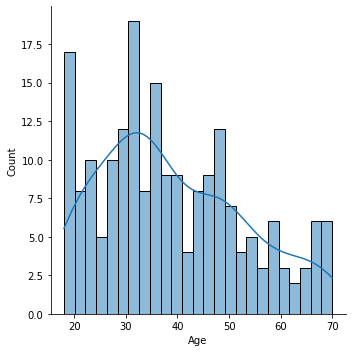

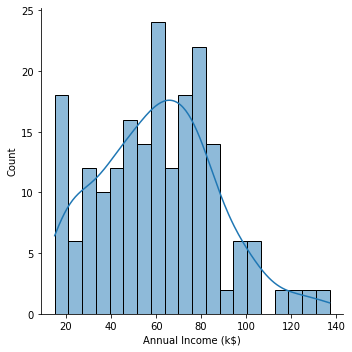

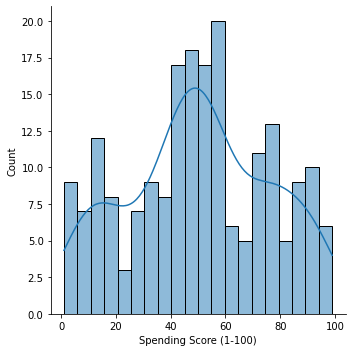

In [28]:
sns.displot(df_customer["Age"],kde=True,bins=25)

sns.displot(df_customer["Annual Income (k$)"],kde=True,bins=20)

sns.displot(df_customer["Spending Score (1-100)"],kde=True,bins=20)

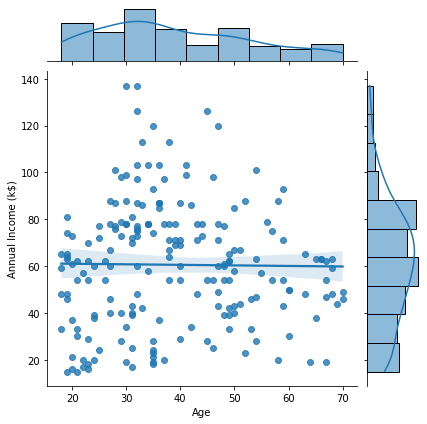

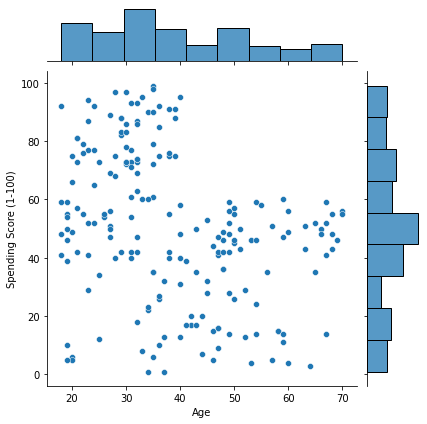

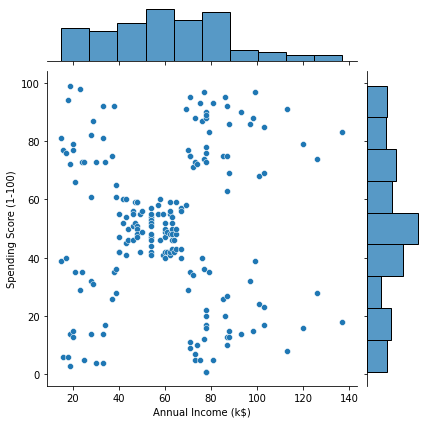

In [32]:
sns.jointplot(x='Age', y='Annual Income (k$)', data=df_customer)
sns.jointplot(x='Age', y='Spending Score (1-100)', data=df_customer)
sns.jointplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df_customer)

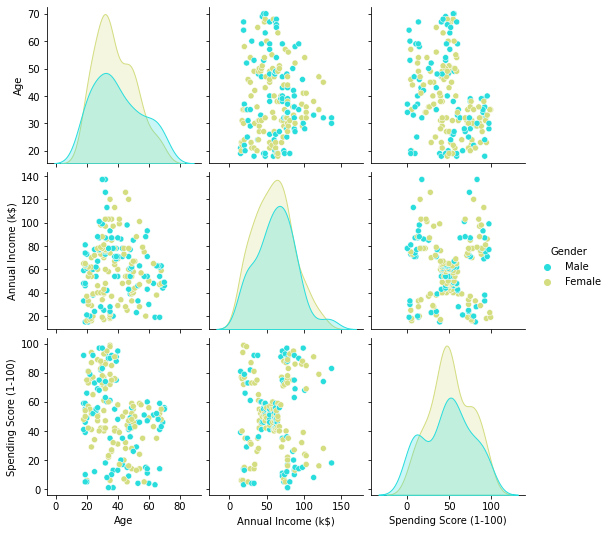

In [40]:
sns.pairplot(df_customer[["Gender","Age","Annual Income (k$)","Spending Score (1-100)"]], hue='Gender',palette='rainbow')

## Trani the Model (Clustering)

## Send us the Result (Maktabkhoone)